In [1]:
import json

cis_filter = False

if cis_filter:
  f = open('rankings_cis_actors.json', 'r')
else:
  f = open('rankings_actors.json', 'r')

original_data = json.load(f)
f.close()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

In [3]:
print(original_data)

[{'strat': 'Governments', 'mu': 3.9856940949179642, 'sigma': 0.7820039157470787}, {'strat': 'Researchers and companies', 'mu': 3.057903834351394, 'sigma': 0.7804346050168929}, {'strat': 'People', 'mu': 2.5651698346657708, 'sigma': 0.7823522713771596}]


In [32]:
## ranges
for p in original_data:
  print(p['strat'])
  print(f"{round(p['mu'] - p['sigma'],2)} / {round(p['mu'] + p['sigma'],2)} / {round(2*p['sigma'],2)}")

Governments
3.2 / 4.77 / 1.56
Researchers and companies
2.28 / 3.84 / 1.56
People
1.78 / 3.35 / 1.56


In [4]:
import scipy.stats as stats

def norm(mu, sigma, n = 1000):
  a = mu - 3*sigma
  b = mu + 3*sigma
  dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
  return dist.rvs(n)

In [5]:
# created the basic data structure that will be plotted



data = []
for i in range(len(original_data)):
  d = original_data[i]
  n = 100000
  values = norm(d['mu'], d['sigma'], n)  
  strat = str(i+1).zfill(2) + '. ' + d['strat']
  for j in range(n):
    data.append([strat, values[j]])
    
df = pd.DataFrame(data, columns=['Actor', 'Value'])
print(df)

                  Actor     Value
0       01. Governments  4.268212
1       01. Governments  2.582960
2       01. Governments  4.621923
3       01. Governments  3.992405
4       01. Governments  3.886280
5       01. Governments  3.034053
6       01. Governments  4.102289
7       01. Governments  5.283438
8       01. Governments  2.474019
9       01. Governments  2.652744
10      01. Governments  3.668825
11      01. Governments  3.988749
12      01. Governments  5.187550
13      01. Governments  4.806916
14      01. Governments  3.216183
15      01. Governments  3.836017
16      01. Governments  4.609563
17      01. Governments  4.294486
18      01. Governments  4.216836
19      01. Governments  4.101098
20      01. Governments  6.262646
21      01. Governments  4.773763
22      01. Governments  3.924348
23      01. Governments  4.239789
24      01. Governments  2.907955
25      01. Governments  4.441050
26      01. Governments  5.230481
27      01. Governments  4.217859
28      01. Go

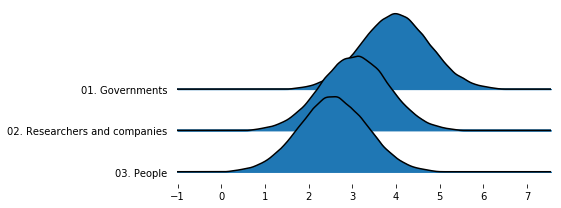

In [6]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="Actor",figsize=(8,3))

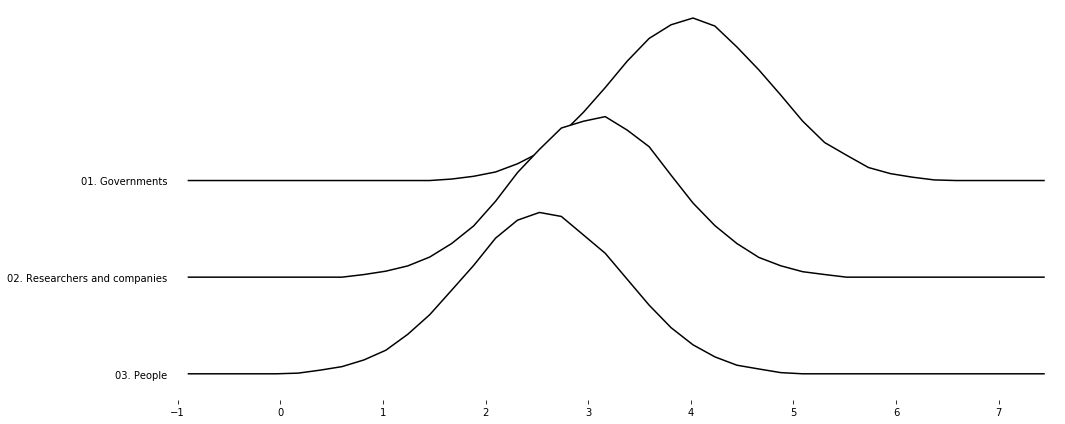

In [38]:
from matplotlib import cm

fig, axes = joypy.joyplot(df, by="Actor", 
                          grid=False, linewidth=1.5, color='w', 
                         legend=False, overlap=2, figsize=(15,6), kind="counts", bins=40)

In [40]:
fig.savefig("rank_actors.svg")